#####                                                                               THE SPARKS FOUNDATION May'21

#### TASK 2- Prediction using Unsupervised ML

#### Aim-
Predict the optimum number of clusters and represent it visually.

#### Author :- Tushar Suresh Patil

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

Loading iris Dataset

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.shape

(150, 4)

Target Variables

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Find optimum amount of clusters for classification 
Now we will implement 'The elbow method' on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification

In [104]:
x = iris_df.values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10 )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [105]:
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.46117267267268,
 39.066035353535376,
 34.40248687182382,
 30.185072738664843,
 27.861741540115133,
 25.8506342560948]

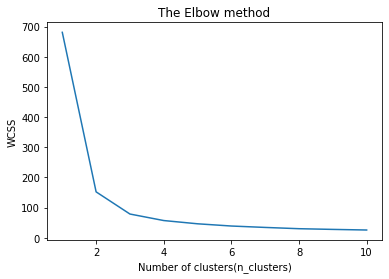

In [106]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters(n_clusters)')
plt.ylabel('WCSS')
plt.show()

In [107]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

We are going to use n_clusters = 3 

#### Model Fitting

In [108]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(x)
y_kmeans=y_kmeans.predict(x)

In [109]:
x[y_kmeans][:10]

array([[4.9, 3. , 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

##### Truth Classifications VS K-Means Classifications

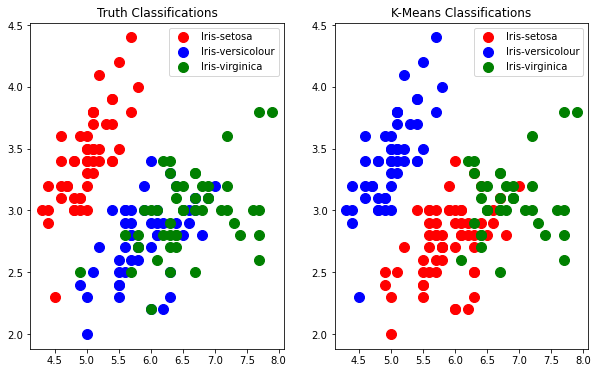

In [126]:
plt.figure(figsize = (10, 6))
ax = plt.subplot(1,2,1)
plt.scatter(x[iris.target == 0, 0], x[iris.target == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[iris.target == 1, 0], x[iris.target == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[iris.target == 2, 0], x[iris.target == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.title('Truth Classifications')
plt.legend()
ax = plt.subplot(1,2,2)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.title('K-Means Classifications')
plt.legend()
plt.show()

In [38]:
color_theme = np.array(['darkgray' , 'lightsalmon', 'powderblue'])

In [39]:
color_theme

array(['darkgray', 'lightsalmon', 'powderblue'], dtype='<U11')

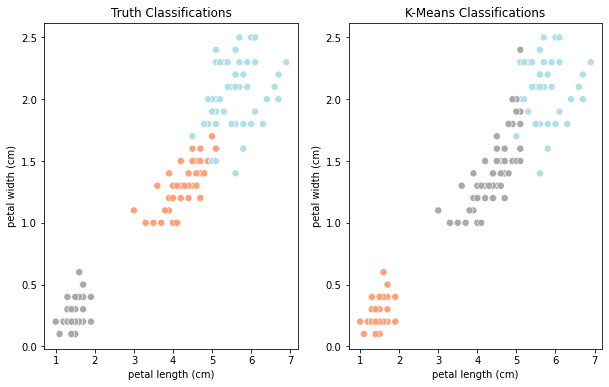

In [127]:
plt.figure(figsize = (10, 6))
ax = plt.subplot(1,2,1)
sns.scatterplot(x=iris_df['petal length (cm)'], y = iris_df['petal width (cm)'],c=color_theme[iris.target], s= 50);
plt.title('Truth Classifications')
ax = plt.subplot(1,2,2)
sns.scatterplot(x=iris_df['petal length (cm)'], y = iris_df['petal width (cm)'] ,c=color_theme[kmeans.labels_], s= 50);
plt.title('K-Means Classifications')
plt.show()

#### Visualising the clusters and Plotting the centroids of the clusters

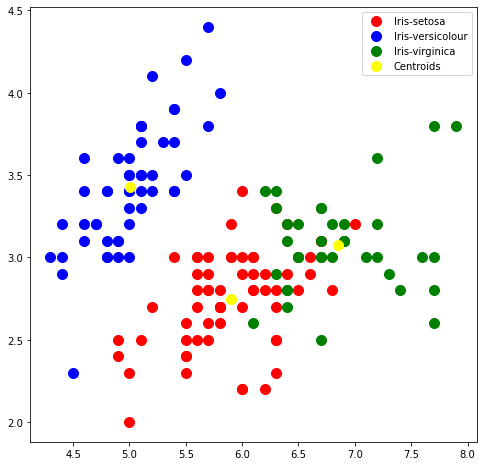

In [132]:
plt.figure(figsize = (8,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

#### Thank You